In [1]:
import pandas_datareader as web
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import datetime as dt
import seaborn as sns

start = dt.datetime(2021,1,1)
end = dt.datetime.now()
btc_price = web.DataReader('BTC-USD','yahoo',start,end)
eth_price = web.DataReader('ETH-USD','yahoo',start,end)


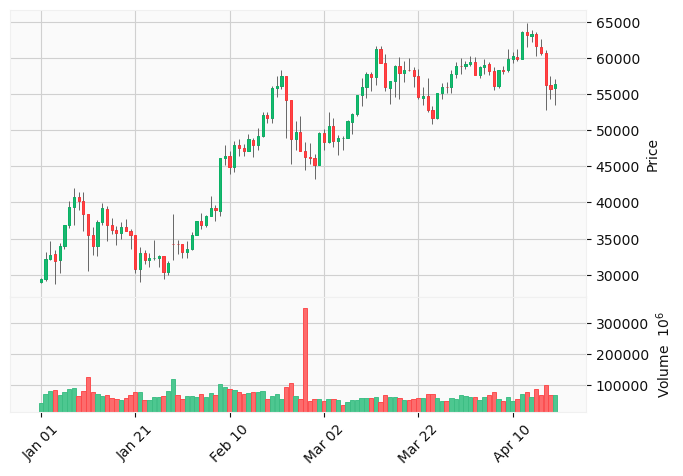

In [2]:
mpf.plot(btc_price, type='candle', style = 'yahoo', volume = True)

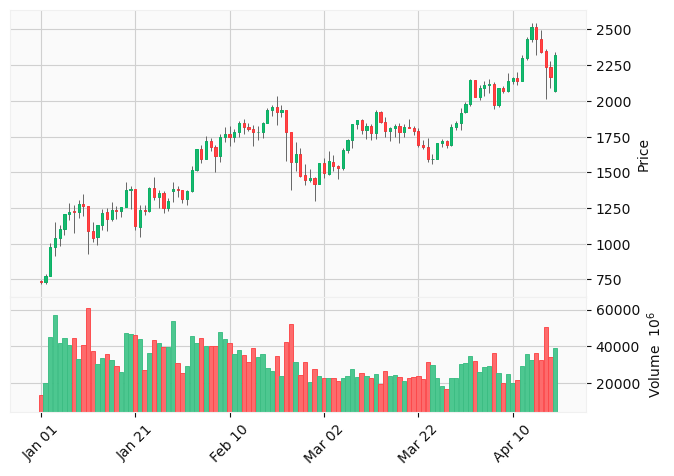

In [3]:
mpf.plot(eth_price, type='candle', style = 'yahoo', volume = True)

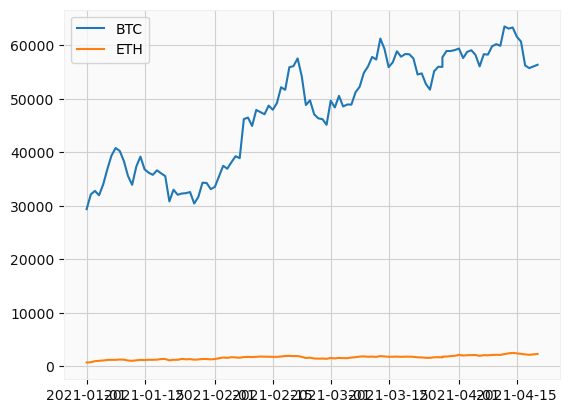

In [4]:
plt.plot(btc_price['Close'], label="BTC")
plt.plot(eth_price['Close'], label='ETH')
plt.legend(loc="upper left")
plt.show()

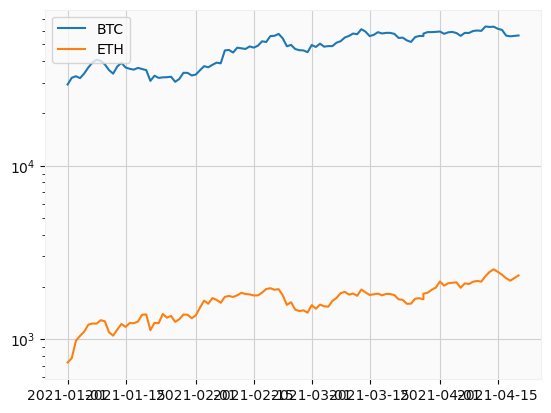

In [5]:
#in log scale
plt.yscale("log")
plt.plot(btc_price['Close'], label="BTC")
plt.plot(eth_price['Close'], label='ETH')
plt.legend(loc="upper left")
plt.show()

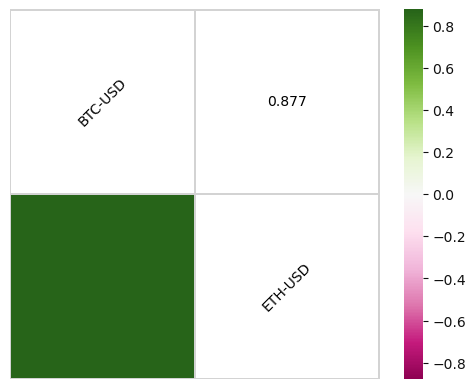

In [6]:
#Finding the correlation and plot the heat map
closing_df = web.DataReader(['BTC-USD','ETH-USD'],'yahoo',start,end)['Close']
corr = closing_df.dropna().corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots()

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, cmap="PiYG", vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)
for i in range(len(corr)):
    ax.text(i+0.5,i+0.5, corr.columns[i], 
            ha="center", va="center", rotation=45)
    for j in range(i+1, len(corr)):
        s = "{:.3f}".format(corr.values[i,j])
        ax.text(j+0.5,(i+0.5),s, 
            ha="center", va="center")
ax.axis("off")
plt.show()

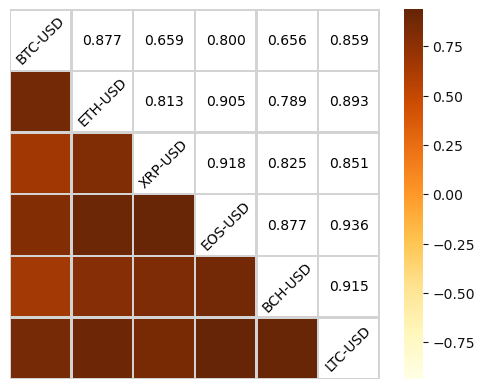

In [7]:
#Let's compare it with other coins
closing_df = web.DataReader(['BTC-USD','ETH-USD','XRP-USD','EOS-USD','BCH-USD','LTC-USD'],'yahoo',start,end)['Close']
corr = closing_df.dropna().corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots()
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, cmap="YlOrBr", vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)
for i in range(len(corr)):
    ax.text(i+0.5,i+0.5, corr.columns[i], 
            ha="center", va="center", rotation=45)
    for j in range(i+1, len(corr)):
        s = "{:.3f}".format(corr.values[i,j])
        ax.text(j+0.5,(i+0.5),s, 
            ha="center", va="center")
ax.axis("off")
plt.show()

In [8]:
#Most of correlation value calculated above is over 0.8, which shows that the price of cryptocurrencies are heavily entangled